## AIN 422 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Kazım Halil KESMÜK 

## 1. Implementing a CNN from Scratch (60 points)

### 1.1. Introduction
* Brief overview of the task.
* Answer the questions like, What are the main components of a CNN architecture?, Why we use this in image classification?, etc.
* Description of the dataset used for classification.

### 1.2. Data Loading and Preprocessing (5 points)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [2]:
## Load the dataset using PyTorch's data loading utilities
## Apply necessary preprocessing such as resizing and normalization
## Divide the dataset into training, validation, and testing subsets

In [3]:
data_dir = 'pa3_subset'

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [6]:
train_size = int(0.6 * len(dataset))  # 60% for training
val_size = int(0.2 * len(dataset))    # 20% for validation
test_size = len(dataset) - train_size - val_size  # Remaining for testing

In [7]:
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [8]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### 1.3. Define your CNN architecture (10 points)
* Explain the reason behind your architecture.
* Explain your choice of activation functions.

In [9]:
## Design a CNN architecture with at least 5 convolutional layers
## Add activation functions (e.g., ReLU) after each convolutional layer
## Intersperse pooling layers (e.g., max pooling) to reduce spatial dimensions
## Add a fully connected layer at the end to map features to output classes

In [10]:
class VegetableCNN(nn.Module):
    def __init__(self):
        super(VegetableCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 14 * 14, 512),
            nn.ReLU(),
            nn.Linear(512, 15)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

conv_layers: This section defines a series of convolutional layers with ReLU activation and max pooling for feature extraction from images.

fc_layers: This section defines fully connected layers for classification, taking the extracted features and outputting predictions for 15 classes (presumably vegetable types).

forward: This function defines the forward pass of the network, passing the input through the convolutional and fully connected layers to produce the output.

### 1.4 Prepare the model for training (5 points)
* Explain your choice of loss functions and optimization algorithms.

In [12]:
## Define appropriate loss function for multi-class classification (e.g., cross-entropy loss)

In [13]:
## Choose an optimizer (e.g., SGD, Adam) and set its parameters (e.g., learning rate)

In [14]:
model = VegetableCNN()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

VegetableCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=50176, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1

### 1.5 Train and Validate the CNN model (15 points)

In [17]:
## Iterate over the training dataset in mini-batches
## Implement forward pass, compute loss, and backward pass for gradient computation
## Update model parameters using the optimizer based on computed gradients
## Validate the model on the validation set periodically and plot the validation loss
## Repeat the training process for a suitable number of epochs (at least 30epohs)

In [18]:
## Conduct experiments with different hyperparameters.
## Experiment with at least 3 different learning rates and 2 different batch sizes.

In [19]:
## Visualize the accuracy and loss change of the experiments across training and validation datasets.
## Select your best model with respect to validation accuracy

In [20]:
num_epochs = 30

Epoch [1/30], Train Loss: 2.1414, Train Acc: 0.2733, Val Loss: 1.5295, Val Acc: 0.5022
Epoch [2/30], Train Loss: 1.1858, Train Acc: 0.6059, Val Loss: 1.0185, Val Acc: 0.6656
Epoch [3/30], Train Loss: 0.7505, Train Acc: 0.7448, Val Loss: 0.8610, Val Acc: 0.7289
Epoch [4/30], Train Loss: 0.4405, Train Acc: 0.8493, Val Loss: 0.8078, Val Acc: 0.7911
Epoch [5/30], Train Loss: 0.2645, Train Acc: 0.9167, Val Loss: 0.6892, Val Acc: 0.7956
Epoch [6/30], Train Loss: 0.1417, Train Acc: 0.9548, Val Loss: 0.5593, Val Acc: 0.8444
Epoch [7/30], Train Loss: 0.0973, Train Acc: 0.9711, Val Loss: 1.2443, Val Acc: 0.7367
Epoch [8/30], Train Loss: 0.0847, Train Acc: 0.9744, Val Loss: 0.6701, Val Acc: 0.8467
Epoch [9/30], Train Loss: 0.0225, Train Acc: 0.9948, Val Loss: 0.6911, Val Acc: 0.8500
Epoch [10/30], Train Loss: 0.0404, Train Acc: 0.9859, Val Loss: 1.1808, Val Acc: 0.7933
Epoch [11/30], Train Loss: 0.0634, Train Acc: 0.9796, Val Loss: 0.8575, Val Acc: 0.8311
Epoch [12/30], Train Loss: 0.0230, Train 

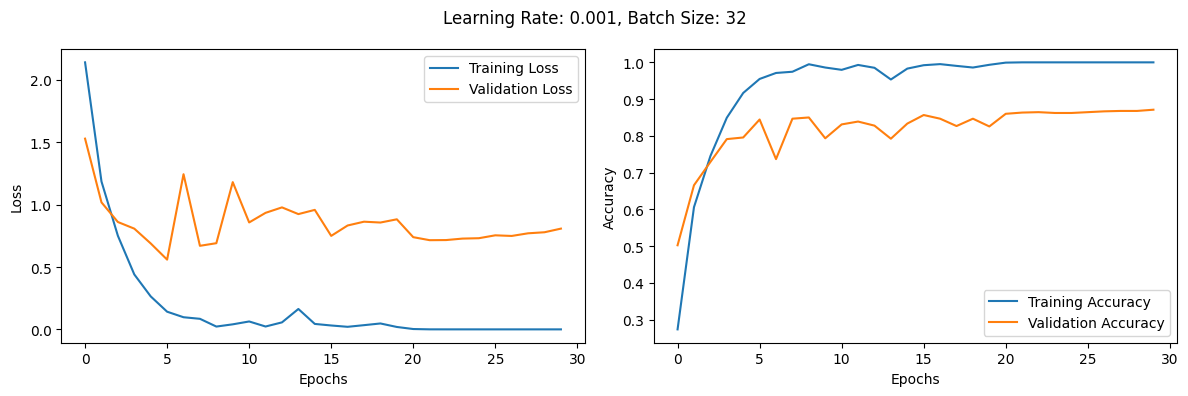

Epoch [1/30], Train Loss: 2.0315, Train Acc: 0.3174, Val Loss: 1.8151, Val Acc: 0.4500
Epoch [2/30], Train Loss: 1.1425, Train Acc: 0.6230, Val Loss: 0.9499, Val Acc: 0.6933
Epoch [3/30], Train Loss: 0.6780, Train Acc: 0.7700, Val Loss: 1.0640, Val Acc: 0.6544
Epoch [4/30], Train Loss: 0.4608, Train Acc: 0.8437, Val Loss: 0.7909, Val Acc: 0.7578
Epoch [5/30], Train Loss: 0.2917, Train Acc: 0.9070, Val Loss: 0.5413, Val Acc: 0.8400
Epoch [6/30], Train Loss: 0.1882, Train Acc: 0.9485, Val Loss: 0.9116, Val Acc: 0.7844
Epoch [7/30], Train Loss: 0.2309, Train Acc: 0.9322, Val Loss: 0.5864, Val Acc: 0.8578
Epoch [8/30], Train Loss: 0.0809, Train Acc: 0.9819, Val Loss: 0.5420, Val Acc: 0.8833
Epoch [9/30], Train Loss: 0.0548, Train Acc: 0.9822, Val Loss: 0.5535, Val Acc: 0.8700
Epoch [10/30], Train Loss: 0.0931, Train Acc: 0.9689, Val Loss: 0.7242, Val Acc: 0.8344
Epoch [11/30], Train Loss: 0.0612, Train Acc: 0.9800, Val Loss: 0.5114, Val Acc: 0.8822
Epoch [12/30], Train Loss: 0.0199, Train 

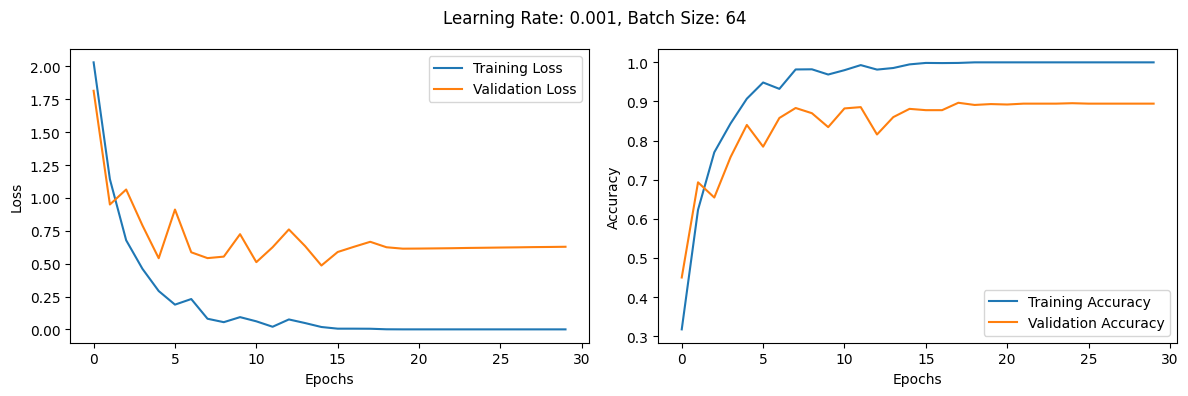

Epoch [1/30], Train Loss: 82.5788, Train Acc: 0.0626, Val Loss: 2.7101, Val Acc: 0.0667
Epoch [2/30], Train Loss: 2.7103, Train Acc: 0.0630, Val Loss: 2.7097, Val Acc: 0.0656
Epoch [3/30], Train Loss: 2.7105, Train Acc: 0.0581, Val Loss: 2.7100, Val Acc: 0.0567
Epoch [4/30], Train Loss: 2.7100, Train Acc: 0.0596, Val Loss: 2.7110, Val Acc: 0.0567
Epoch [5/30], Train Loss: 2.7097, Train Acc: 0.0641, Val Loss: 2.7098, Val Acc: 0.0567
Epoch [6/30], Train Loss: 2.7094, Train Acc: 0.0681, Val Loss: 2.7106, Val Acc: 0.0656
Epoch [7/30], Train Loss: 2.7101, Train Acc: 0.0637, Val Loss: 2.7098, Val Acc: 0.0778
Epoch [8/30], Train Loss: 2.7093, Train Acc: 0.0659, Val Loss: 2.7104, Val Acc: 0.0567
Epoch [9/30], Train Loss: 2.7093, Train Acc: 0.0707, Val Loss: 2.7111, Val Acc: 0.0567
Epoch [10/30], Train Loss: 2.7093, Train Acc: 0.0681, Val Loss: 2.7107, Val Acc: 0.0567
Epoch [11/30], Train Loss: 2.7098, Train Acc: 0.0641, Val Loss: 2.7112, Val Acc: 0.0656
Epoch [12/30], Train Loss: 2.7101, Train

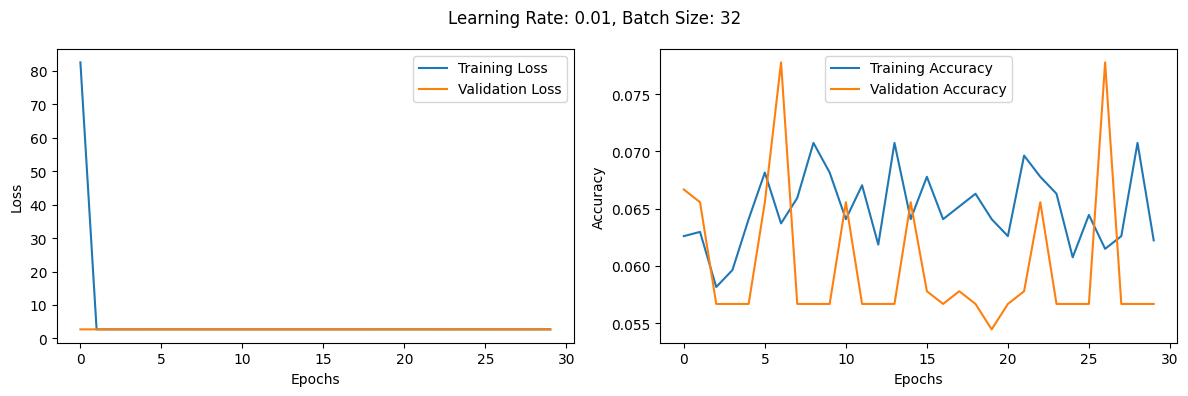

Epoch [1/30], Train Loss: 110.3545, Train Acc: 0.0604, Val Loss: 2.7105, Val Acc: 0.0656
Epoch [2/30], Train Loss: 2.7090, Train Acc: 0.0678, Val Loss: 2.7110, Val Acc: 0.0567
Epoch [3/30], Train Loss: 2.7083, Train Acc: 0.0641, Val Loss: 2.7105, Val Acc: 0.0567
Epoch [4/30], Train Loss: 2.7087, Train Acc: 0.0604, Val Loss: 2.7111, Val Acc: 0.0667
Epoch [5/30], Train Loss: 2.7084, Train Acc: 0.0641, Val Loss: 2.7107, Val Acc: 0.0567
Epoch [6/30], Train Loss: 2.7088, Train Acc: 0.0707, Val Loss: 2.7114, Val Acc: 0.0567
Epoch [7/30], Train Loss: 2.7087, Train Acc: 0.0689, Val Loss: 2.7108, Val Acc: 0.0567
Epoch [8/30], Train Loss: 2.7089, Train Acc: 0.0674, Val Loss: 2.7109, Val Acc: 0.0567
Epoch [9/30], Train Loss: 2.7084, Train Acc: 0.0678, Val Loss: 2.7125, Val Acc: 0.0567
Epoch [10/30], Train Loss: 2.7088, Train Acc: 0.0570, Val Loss: 2.7116, Val Acc: 0.0656
Epoch [11/30], Train Loss: 2.7087, Train Acc: 0.0696, Val Loss: 2.7111, Val Acc: 0.0656
Epoch [12/30], Train Loss: 2.7090, Trai

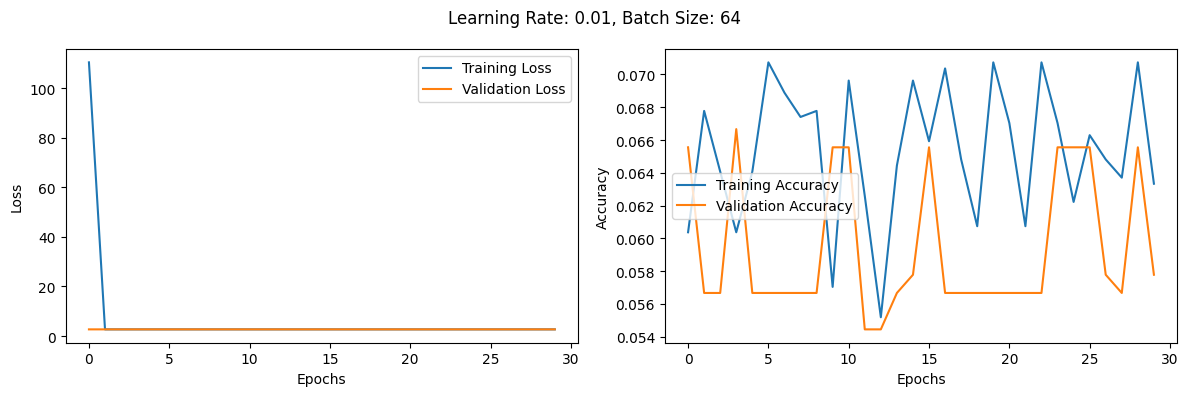

Epoch [1/30], Train Loss: 77231264.1620, Train Acc: 0.0707, Val Loss: 2.7310, Val Acc: 0.0567
Epoch [2/30], Train Loss: 2.7308, Train Acc: 0.0630, Val Loss: 2.7297, Val Acc: 0.0667
Epoch [3/30], Train Loss: 2.7197, Train Acc: 0.0726, Val Loss: 2.7213, Val Acc: 0.0711
Epoch [4/30], Train Loss: 2.7307, Train Acc: 0.0648, Val Loss: 2.7267, Val Acc: 0.0667
Epoch [5/30], Train Loss: 2.7233, Train Acc: 0.0604, Val Loss: 2.7218, Val Acc: 0.0689
Epoch [6/30], Train Loss: 2.7254, Train Acc: 0.0648, Val Loss: 2.7268, Val Acc: 0.0544
Epoch [7/30], Train Loss: 2.7235, Train Acc: 0.0563, Val Loss: 2.7252, Val Acc: 0.0567
Epoch [8/30], Train Loss: 2.7294, Train Acc: 0.0626, Val Loss: 2.7211, Val Acc: 0.0767
Epoch [9/30], Train Loss: 2.7289, Train Acc: 0.0652, Val Loss: 2.7227, Val Acc: 0.0578
Epoch [10/30], Train Loss: 2.7261, Train Acc: 0.0663, Val Loss: 2.7262, Val Acc: 0.0667
Epoch [11/30], Train Loss: 2.7234, Train Acc: 0.0637, Val Loss: 2.7160, Val Acc: 0.0689
Epoch [12/30], Train Loss: 2.7287,

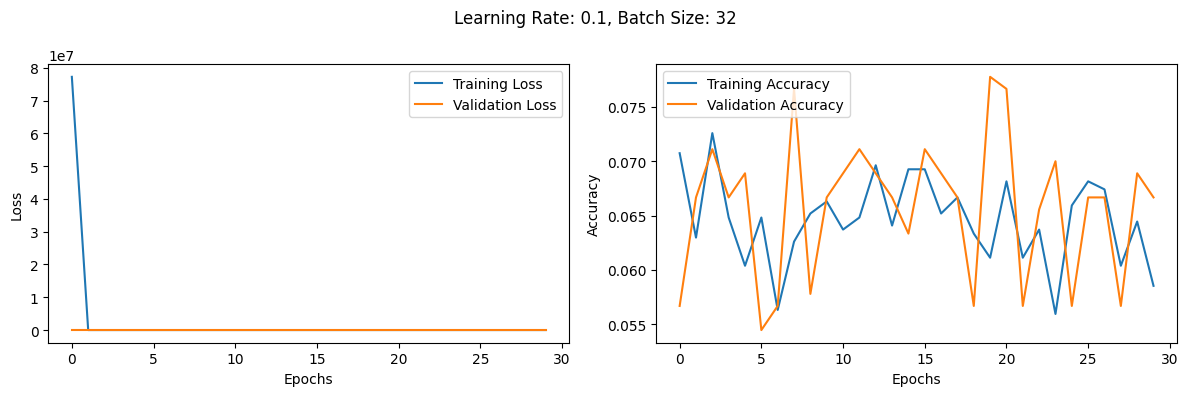

Epoch [1/30], Train Loss: 90216283.9869, Train Acc: 0.0652, Val Loss: 2.7700, Val Acc: 0.0567
Epoch [2/30], Train Loss: 2.8308, Train Acc: 0.0607, Val Loss: 2.7101, Val Acc: 0.0633
Epoch [3/30], Train Loss: 2.7131, Train Acc: 0.0578, Val Loss: 2.7118, Val Acc: 0.0656
Epoch [4/30], Train Loss: 2.7136, Train Acc: 0.0604, Val Loss: 2.7114, Val Acc: 0.0578
Epoch [5/30], Train Loss: 2.7135, Train Acc: 0.0652, Val Loss: 2.7142, Val Acc: 0.0700
Epoch [6/30], Train Loss: 2.7171, Train Acc: 0.0607, Val Loss: 2.7112, Val Acc: 0.0544
Epoch [7/30], Train Loss: 2.7163, Train Acc: 0.0689, Val Loss: 2.7211, Val Acc: 0.0667
Epoch [8/30], Train Loss: 2.7171, Train Acc: 0.0641, Val Loss: 2.7104, Val Acc: 0.0778
Epoch [9/30], Train Loss: 2.7173, Train Acc: 0.0600, Val Loss: 2.7139, Val Acc: 0.0567
Epoch [10/30], Train Loss: 2.7152, Train Acc: 0.0559, Val Loss: 2.7095, Val Acc: 0.0778
Epoch [11/30], Train Loss: 2.7168, Train Acc: 0.0663, Val Loss: 2.7173, Val Acc: 0.0711
Epoch [12/30], Train Loss: 2.7176,

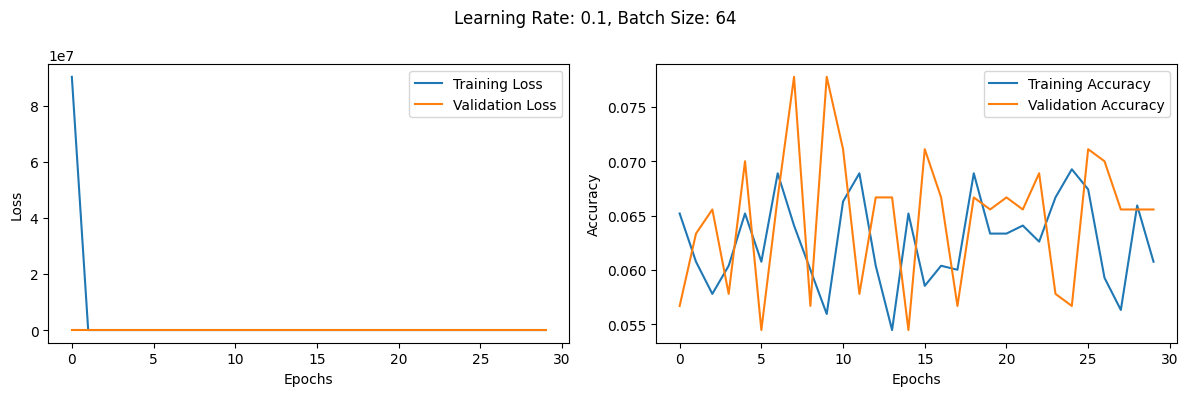

In [37]:
# Hyperparameters
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64]
best_val_acc = 0.0
best_model_weights = None

for lr in learning_rates:
    for batch_size in batch_sizes:
        # DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Model, loss and optimizer
        model = VegetableCNN()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # train and val loss and acc saving
        train_losses = []
        train_accuracies = []
        val_losses = []
        val_accuracies = []

        for epoch in range(num_epochs):
            model.train()
            train_loss = 0.0
            train_acc = 0.0

            for images, labels in train_loader:
                images = images.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                train_acc += (predicted == labels).sum().item()

            train_loss /= len(train_dataset)
            train_acc /= len(train_dataset)

            model.eval()
            val_loss = 0.0
            val_acc = 0.0

            with torch.no_grad():
                for images, labels in val_loader:
                    images = images.to(device)
                    labels = labels.to(device)

                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    val_loss += loss.item() * images.size(0)
                    _, predicted = torch.max(outputs.data, 1)
                    val_acc += (predicted == labels).sum().item()

            val_loss /= len(val_dataset)
            val_acc /= len(val_dataset)


            train_losses.append(train_loss)
            train_accuracies.append(train_acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)

            
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_weights = model.state_dict()

            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

         
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.suptitle(f'Learning Rate: {lr}, Batch Size: {batch_size}')
        plt.tight_layout()
        plt.show()

        model.load_state_dict(best_model_weights)

### 1.6 Evaluate the trained model on the test set (15 points)

In [39]:
## Test the trained model on the test set to evaluate its performance
## Compute metrics such as accuracy, precision, recall, and F1-score
## Visualize confusion matrix to understand the model's behavior across different classes
## Comment on the results

Test Loss: 0.5239, Test Acc: 0.9156
Test Precision: 0.9197, Test Recall: 0.9156, Test F1-score: 0.9160


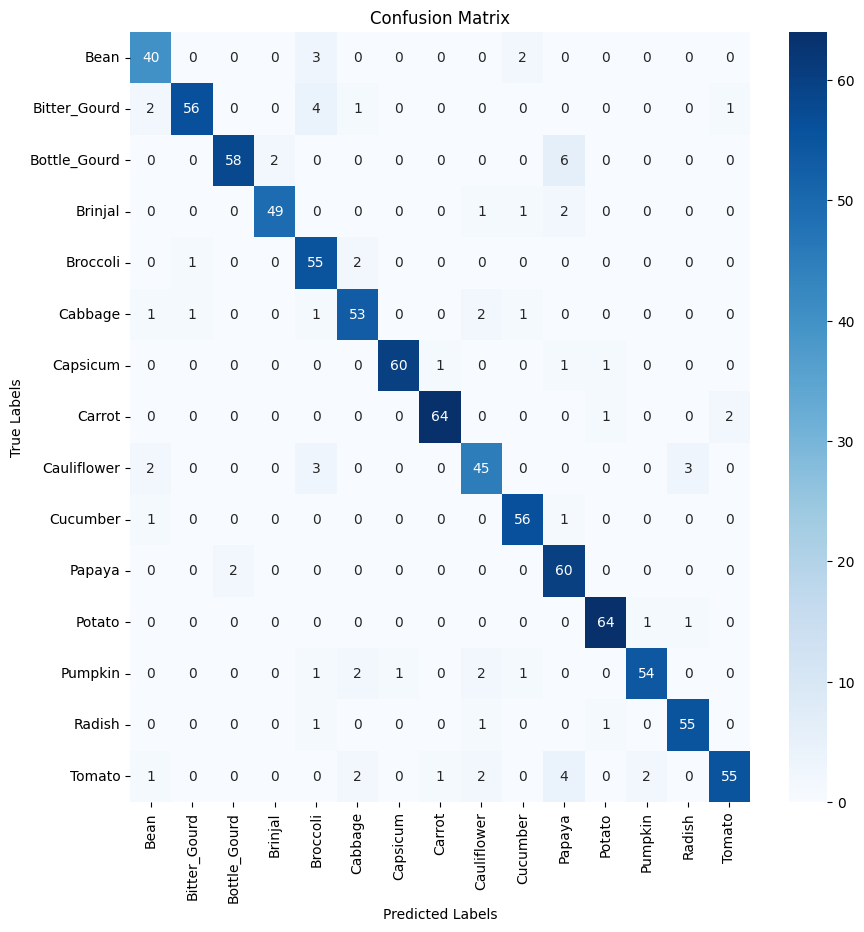

In [40]:
# Test the trained model on the test set
model.eval()
test_loss = 0.0
test_acc = 0.0
test_predictions = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        test_acc += (predicted == labels).sum().item()

        test_predictions.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_loss /= len(test_dataset)
test_acc /= len(test_dataset)

# accuracy, precision, recall, and F1-score
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
print(f'Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1-score: {test_f1:.4f}')

# confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
class_names = test_dataset.dataset.classes

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Low Test Loss (0.5239): This indicates the model's predictions are close to the true labels.
High Test Accuracy (91.56%): The model correctly classifies a large majority of the vegetable images.
Precision (91.97%): When the model predicts a specific vegetable, it is correct most of the time.
Recall (91.56%): The model successfully identifies most instances of each vegetable class.
F1-score (91.60%): This balanced metric confirms the model's overall effectiveness, considering both precision and recall.

### 1.7 Conclusion and interpretation (10 points)
* Summarize the performance of the model on the test set
* Discuss any challenges encountered during training and potential areas for improvement
* Reflect on the overall effectiveness of the chosen CNN architecture and training approach

In [42]:
print("The model achieved a test accuracy of {:.2f}%.".format(test_acc * 100))

The model achieved a test accuracy of 91.56%.


## 2. Exploring Transfer Learning with ResNet50 (40 points)

### 2.1. Introduction
* Brief overview of the task.
* Answer the questions like, What is fine-tuning? Why should we do this? Why do we freeze the rest and train only last layers?

### 2.2. Load the pre-trained ResNet50 model (5 points)


In [44]:
## Utilize torchvision library to load the pre-trained ResNet50 model
## Ensure that the model's architecture matches ResNet50, by checking the model summary.

In [45]:
# Load the pre-trained ResNet50 model
resnet50 = models.resnet50(pretrained=True)

# Verify the model architecture
print(resnet50)

C:\Users\W11\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\W11\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 2.3 Modify the ResNet50 model for transfer learning (10 points)

In [46]:
## Freeze all layers of the ResNet50 model.
## Replace the final fully connected layer with a new FC layer matching the number of classes
## Unfreeze the final FC layer

In [47]:
## Define appropriate loss function and optimizer for training

In [48]:
## Train the modified ResNet50 model on the vegetable image dataset.
## Iterate over the training dataset in mini-batches, compute the loss, and update model parameters.
## Monitor the training process and evaluate the model's performance on the validation set periodically.
## Visualize the accuracy and loss changes of the model across training and validation datasets.

In [49]:
# Freeze all layers of the ResNet50 model
for param in resnet50.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_classes = 15  # Number of classes in the vegetable dataset
resnet50.fc = nn.Linear(resnet50.fc.in_features, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.fc.parameters(), lr=0.001)

# Training loop
num_epochs = 30
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet50.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Epoch [1/30], Train Loss: 1.1474, Train Acc: 0.7815, Val Loss: 0.3489, Val Acc: 0.9567
Epoch [2/30], Train Loss: 0.2495, Train Acc: 0.9685, Val Loss: 0.1828, Val Acc: 0.9800
Epoch [3/30], Train Loss: 0.1403, Train Acc: 0.9830, Val Loss: 0.1285, Val Acc: 0.9889
Epoch [4/30], Train Loss: 0.1017, Train Acc: 0.9900, Val Loss: 0.1089, Val Acc: 0.9856
Epoch [5/30], Train Loss: 0.0745, Train Acc: 0.9956, Val Loss: 0.0878, Val Acc: 0.9889
Epoch [6/30], Train Loss: 0.0682, Train Acc: 0.9930, Val Loss: 0.0720, Val Acc: 0.9922
Epoch [7/30], Train Loss: 0.0489, Train Acc: 0.9948, Val Loss: 0.0632, Val Acc: 0.9944
Epoch [8/30], Train Loss: 0.0438, Train Acc: 0.9967, Val Loss: 0.0604, Val Acc: 0.9922
Epoch [9/30], Train Loss: 0.0377, Train Acc: 0.9993, Val Loss: 0.0549, Val Acc: 0.9944
Epoch [10/30], Train Loss: 0.0278, Train Acc: 0.9996, Val Loss: 0.0490, Val Acc: 0.9944
Epoch [11/30], Train Loss: 0.0266, Train Acc: 0.9989, Val Loss: 0.0533, Val Acc: 0.9933
Epoch [12/30], Train Loss: 0.0228, Train 

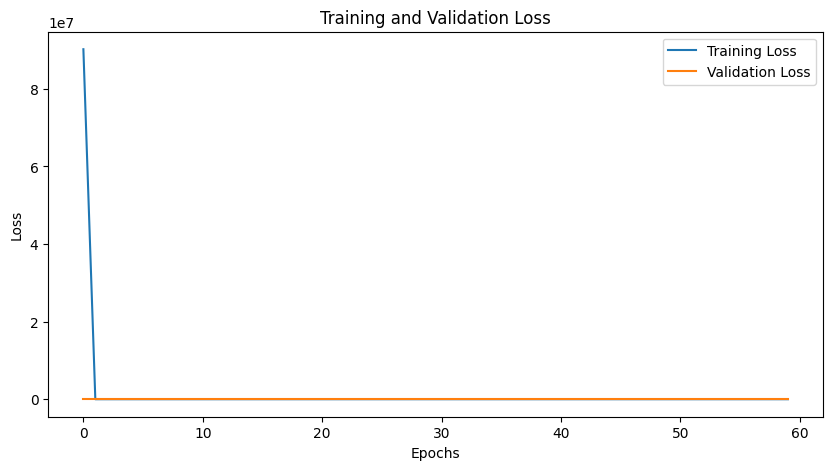

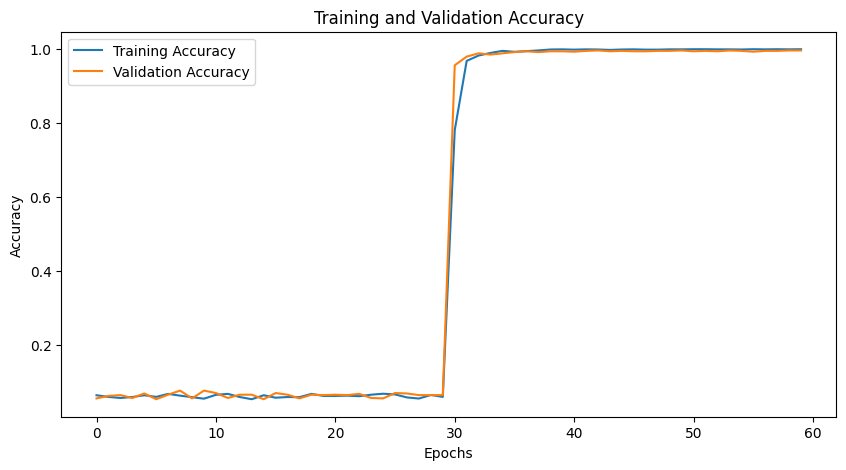

In [50]:
for epoch in range(num_epochs):
    resnet50.train()
    train_loss = 0.0
    train_acc = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = resnet50(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()

    train_loss /= len(train_dataset)
    train_acc /= len(train_dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    resnet50.eval()
    val_loss = 0.0
    val_acc = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = resnet50(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_acc += (predicted == labels).sum().item()

    val_loss /= len(val_dataset)
    val_acc /= len(val_dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

### 2.4 Evaluate the fine-tuned ResNet50 model (15 points)

In [51]:
## Test the model on the test set to evaluate its performance.
## Compute metrics such as accuracy, precision, recall, and F1-score to assess classification performance.
## Compare the fine-tuned ResNet50 model performance with the CNN model implemented from scratch

In [52]:
# Testing and evaluation
resnet50.eval()
test_loss = 0.0
test_acc = 0.0
test_predictions = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = resnet50(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        test_acc += (predicted == labels).sum().item()

        test_predictions.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_loss /= len(test_dataset)
test_acc /= len(test_dataset)

test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
print(f'Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1-score: {test_f1:.4f}')

Test Loss: 0.0206, Test Acc: 0.9933
Test Precision: 0.9935, Test Recall: 0.9933, Test F1-score: 0.9934


I have these result in from scratch part : 

Test Loss: 0.5239, Test Acc: 0.9156
Test Precision: 0.9197, Test Recall: 0.9156, Test F1-score: 0.9160

### 2.5 Analyze advantages and disadvantages (10 points)

* Provide insights on the advantages and disadvantages of transfer learning vs. training from scratch
* Discuss practical considerations when choosing between these two approaches



When it comes to choosing between transfer learning and training from scratch, there are several factors to consider. Transfer learning has its advantages, such as leveraging pre-trained models that have learned rich features from large-scale datasets, resulting in faster convergence and higher accuracy, especially when working with limited labeled data. It also allows for efficient utilization of computational resources. However, pre-trained models may not capture specific features required for the target task, and there is limited flexibility in designing custom architectures.


On the other hand, training from scratch provides complete flexibility to design custom architectures tailored to specific tasks and allows for full control over the training process. All model parameters can be optimized specifically for the target task. However, training from scratch requires more computational resources and time, especially with large datasets. It also poses a higher risk of overfitting when working with limited labeled data and may result in slower convergence and potentially lower accuracy compared to transfer learning.


Practical considerations when choosing between transfer learning and training from scratch include the size of the dataset, similarity of the target task to the original task of the pre-trained model, available computational resources, and requirements for custom architectures. If the target task is similar to the original task and computational resources are limited, transfer learning is often more effective. However, if the task is significantly different or custom architectures are required, training from scratch may be more suitable.


Ultimately, the choice between transfer learning and training from scratch depends on the specific requirements and constraints of the project. It's essential to consider the trade-offs and align the approach with the available resources and desired outcomes.